**Investigating Potential Dust Generation Areas in Kern County, CA**

***Initial Dataset Identification and Eploration***

I identified several potential datasets which give information on land use and land cover in Kern County CA. All datasets are vector format.

1. Kern County 2018 land cover areas from CA Dept of Conservation (https://www.conservation.ca.gov/dlrp/fmmp/)
3. Kern County 2040 General Plan, last updated fall 2019 (https://geodat-kernco.opendata.arcgis.com/datasets/575bd48fb01c44899334301c8e6da015_0)
4. MESMA census tract dataset is an already processed aggregation at the census tract level of satellite imagery processed using multiple endmember spectral mixture analysis (MESMA) *(I have access to this dataset through my GSR position in the Remais Lab in the Division of Environmental Health Sciences)*


*Note: While I do have access to data at the county level for coccidioidomycosis (valley fever) cases, that data is considered confidential as it is health data from CA Dept of Public Health. As such, I don't think I can include the actual case data in this project. What I can say is that Kern County by far has the most cases per year for every year that reporting has been in place for valley fever (1999-present). This, along with public availability of zoning and general plan spatial data for Kern County, makes Kern County especially relevent to do this exploration of dust as it relates to valley fever exposure.*

In [65]:
import numpy as np
import pandas as pd
import matplotlib as plt
import geopandas as gpd
import fiona
import shapely
import plotly
import requests

In [66]:
!pip install geoplot

  Using cached https://files.pythonhosted.org/packages/a0/40/40c264002dfba4736f35c3524f6a0e7a03458fb4fcc436ce501f541359b7/geoplot-0.4.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/bb/e0/fd2f860ac34c97c1370514a1fa37d33c46dca5bea8a6f49dc167fbffbc1f/contextily-1.0rc2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f6/89/62912e01f3cede11edcc0abf81298e3439d9c06c8dce644369380ed13f6d/Deprecated-1.2.7-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c7/81/13321f88f582a00705c5f348724728e8999136e19d6e7c56f7e6ac9bb7f9/rasterio-1.1.3-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/9d/1d/80d28ba17e4647bf820e8d5f485d58f9da9c5ca424450489eb49e325ba66/mercantile-1.1.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/cc/0e/d27d6e806d6c0d1a2cfdc5d1f088e42339a0a54a09c3343f7f81ec8947ea/snuggs-1.4.7-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packag

**Download and Read in CA Dept Conservation data**

In [2]:
url = "https://github.com/mswilliams108/cp255_work/raw/master/kern2018.zip"

with open ("kern2018.zip", "wb") as f: 
    r = requests.get(url)
    f.write(r.content)

kerncons = gpd.read_file("zip://kern2018.zip")
kerncons.head()

,upd_year,county_nam,polygon_ac,Shape_Leng,Shape_Area,polygon_ty,geometry
0,2018.0,ker,27.698287,1463.671506,1.120910e+05,Cl,POLYGON ((68648.48550000042 -323107.8948999997...
1,2018.0,ker,25.992533,1339.723825,1.051880e+05,Cl,POLYGON ((90988.60830000043 -322729.2531000003...
2,2018.0,ker,17.121042,1282.237244,6.928640e+04,Cl,"POLYGON ((102731.7824999988 -321463.5543, 1027..."
3,2018.0,ker,59.389965,2159.856162,2.403427e+05,Cl,POLYGON ((99648.97540000081 -316228.8006999996...
4,2018.0,ker,308.904580,6516.358133,1.250092e+06,Cl,POLYGON ((81084.46209999919 -315636.9029999999...


***From Metadata for CA Dept of Conservation***

link:https://www.conservation.ca.gov/dlrp/fmmp/Pages/Kern.aspx

Attribute_Label: POLYGON_TY
    
   **Attribute_Definition:**
        Identifies the mapping categories used by the Farmland Mapping and Monitoring Program.
    
   **Attribute_Definition_Source:** 
        Definitions were developed by the USDA-NRCS as part of their nationwide Land Inventory and Monitoring (LIM) system.
    
   Attribute_Domain_Values:
    
   
   Enumerated_Domain:
    **Enumerated_Domain_Value: Prime Farmland (P)**
    Enumerated_Domain_Value_Definition:
    Prime Farmland has the best combination of physical and chemical features able to sustain long-term agricultural production. This land has the soil quality, growing season, and moisture supply needed to produce sustained high yields. Land must have been used for irrigated agricultural production at some time during the four years prior to the mapping date.
    
    
   Enumerated_Domain:
    **Enumerated_Domain_Value: Farmland of Statewide Importance (S)**
    Enumerated_Domain_Value_Definition:
    Farmland of Statewide Importance is similar to Prime Farmland but with minor shortcomings, such as greater slopes or less ability to store soil moisture. Land must have been used for irrigated agricultural production at some time during the four years prior to the mapping date.
    
    
   Enumerated_Domain:
    **Enumerated_Domain_Value: Unique Farmland (U)**
    Enumerated_Domain_Value_Definition:
    Unique Farmland consists of lesser quality soils used for the production of the state's leading agricultural crops. This land is usually irrigated, but may include nonirrigated orchards or vineyards as found in some climatic zones in California. Land must have been cropped at some time during the four years prior to the mapping date.
    
    
   Enumerated_Domain:
    **Enumerated_Domain_Value: Farmland of Local Importance (L)**
    Enumerated_Domain_Value_Definition:
    The Board of Supervisors determined that there will be no Farmland of Local Importance for Kern County.
    
    
   Enumerated_Domain:
    **Enumerated_Domain_Value: Grazing Land (G)**
    Enumerated_Domain_Value_Definition:
    Grazing Land is land on which the existing vegetation is suited to the grazing of livestock.
    
    
   Enumerated_Domain:
    **Enumerated_Domain_Value: Urban and Built-Up Land (D)**
    Enumerated_Domain_Value_Definition:
    Urban and Built-Up land is occupied by structures with a building density of at least 1 unit to 1.5 acres, or approximately 6 structures to a 10-acre parcel. Common examples include residential, industrial, commercial, institutional facilities, cemeteries, airports, golf courses, sanitary landfills, sewage treatment, and water control structures.
   
   
   Enumerated_Domain:
    **Enumerated_Domain_Value: Other Land (X)**
    Enumerated_Domain_Value_Definition:
    Other Land is land not included in any other mapping category. Common examples include low density rural developments, brush, timber, wetland, and riparian areas not suitable for livestock grazing, confined livestock, poultry, or aquaculture facilities, strip mines, borrow pits, and water bodies smaller than 40 acres. Vacant and nonagricultural land surrounded on all sides by urban development and greater than 40 acres is mapped as Other Land. This category was subdivided into R, V, Cl, sAC, and nv beginning with the 2006 data.
      
      
   Enumerated_Domain:
    **Enumerated_Domain_Value: Water (W)**
    Enumerated_Domain_Value_Definition:
    Perennial water bodies with an extent of at least 40 acres.
    
    
   Enumerated_Domain:
    **Enumerated_Domain_Value: Irrigated Farmland (I)**
    Enumerated_Domain_Value_Definition:
    Cropped land with a developed irrigation water supply that is dependable and of adequate quality. Land must have been used for production of irrigated crops at some time during the four years prior to the mapping date. Irrigated farmland is considered an 'Interim' category for use until completion of USDA-NRCS soil surveys.
    Enumerated_Domain_Value_Definition_Source:
    The Irrigated Farmland category is only used in specific agricultural counties lacking modern soil surveys. It is applicable for Southwestern and Northeastern Kern County for 1988-2002 data. It was upgraded to Important Farmland status in 2004 upon completion of the following NRCS soil surveys (CA668) (CA669) (CA682) (CA691) (CA760) (CA772).
    
    
   Enumerated_Domain:
    **Enumerated_Domain_Value: Non-irrigated Farmland (N)**
    Enumerated_Domain_Value_Definition:
    Land on which agricultural commodities are produced on a continuing or cyclic basis utilizing stored soil moisture. Non-Irrigated Farmland is considered an 'Interim' category for use until completion of USDA-NRCS soil surveys.
    Enumerated_Domain_Value_Definition_Source:
    The Non-Irrigated Farmland category is only used in specific agricultural counties lacking modern soil surveys. It is applicable for Southwestern and Northeastern Kern County for 1988-2002 data. It was upgraded to Important Farmland status in 2004 upon completion of the following NRCS soil surveys (CA668) (CA669) (CA682) (CA691) (CA760) (CA772).
   
   
   Enumerated_Domain:
    **Enumerated_Domain_Value: Rural Residential Land (R)**
    Enumerated_Domain_Value_Definition:
    Rural Residential Land includes residential areas of one to five structures per ten acres.
    
    
   Enumerated_Domain:
    **Enumerated_Domain_Value: Vacant or Disturbed Land (V)**
    Enumerated_Domain_Value_Definition:
    Vacant or Disturbed Land includes open field areas that do not qualify for an agricultural category, mineral and oil extraction areas, off road vehicle areas, electrical substations, channelized canals, and rural freeway interchanges.
    
   
   Enumerated_Domain:
    **Enumerated_Domain_Value: Confined Animal Agriculture (Cl)**
    Enumerated_Domain_Value_Definition:
    Confined Animal Agricultural lands include poultry facilities, feedlots, dairy facilities, and fish farms.
    
    
   Enumerated_Domain:
    **Enumerated_Domain_Value: Nonagricultural and Natural Vegetation (nv)**
    Enumerated_Domain_Value_Definition:
    Nonagricultural and Natural Vegetation includes heavily wooded, rocky or barren areas, riparian and wetland areas, grassland areas which do not qualify for grazing land due to their size or land management restrictions, small water bodies and recreational water ski lakes. Constructed wetlands are also included in this category.
    
    
   Enumerated_Domain:
    **Enumerated_Domain_Value: Semi-Agricultural and Rural Commercial Land (sAC)**
    Enumerated_Domain_Value_Definition:
    Semi-Agricultural and Rural Commercial Land includes farmsteads, agricultural storage and packing sheds, unpaved parking areas, composting facilities, equine facilities, firewood lots, and campgrounds.

**Next, explore Kern General Plan data**

I also found a zoning dataset from Kern County, but thought the general plan may offer better insight as to what is being built where right now. 

In [123]:
url = "https://github.com/mswilliams108/cp255_work/raw/master/kc_general_plan.zip"

with open ("kc_general_plan.zip", "wb") as f: 
    r = requests.get(url)
    f.write(r.content)
    
url = "zip://kc_general_plan.zip"
kerngp = gpd.read_file(url)
kerngp.head()

,FID,OBJECTID,GP_DESIG,SP_DESIG,SP_NAME,LU_DESC,HAZ_DESC,LABEL,NOTES,ChangeDate,ChangeRef,Resolution,HAZARD,Shape_Leng,Shape_Area,Shape__Are,Shape__Len,geometry
0,1,501,3.1,None,None,Public or Private Recreation Areas,None,3.1,None,None,None,None,None,10152.127949,6.520142e+06,9.101677e+05,3792.805615,"POLYGON ((-119.323463940867 35.238791814608, -..."
1,2,502,3.1,None,None,Public or Private Recreation Areas,None,3.1,None,None,None,None,None,8492.994057,3.214447e+06,4.517439e+05,3184.704742,"POLYGON ((-119.10867054645 35.5149851720921, -..."
2,3,503,3.1,None,None,Public or Private Recreation Areas,None,3.1,None,None,None,None,None,17085.479288,1.084283e+07,1.526759e+06,6414.333004,"POLYGON ((-119.127470953894 35.5986333610869, ..."
3,4,504,3.1,None,None,Public or Private Recreation Areas,Flood Hazard,3.1/2.5,None,None,None,None,2.5,1832.106628,1.073366e+05,1.483201e+04,680.252098,"POLYGON ((-118.998520292305 34.8175352738125, ..."
4,5,505,3.1,None,None,Public or Private Recreation Areas,Seismic Hazard,3.1/2.1,None,None,None,None,2.1,2925.208216,4.940254e+05,6.826783e+04,1086.712385,"POLYGON ((-118.998219573571 34.8181725511574, ..."


In [101]:
kerngp.LU_DESC.unique() 
#LUs for potential dust generation include 'Public or Private Recreation Areas', 'Public Lands', 
#'Open Space - Includes Resource Management Areas, Agriculture, & Floodplains', 
#'Greenbelt Areas (Transmission Line Easements)', 'Mineral and Petroleum', 'Rural Residential',
#'Resource Reserve (Min. 20 Acre Parcel Size)', 'Interim Rural Community Plan', ''Rural Community',
#'Permament Open Space', 'Open Space - Slopes Exceeding 30%',
#'Low Density Residential', 'Reserve', 'Reserve - Undesignated'

array(['Public or Private Recreation Areas', 'Educational Facilities',
       'Other Facilities', 'Solid Waste Facilities',
       'Solid Waste Disposal Facility Buffer',
       'Other Waste Facilities - Nonhazardous/Nondisposal',
       'Maximum 29 Units/Net Acre', 'Maximum 16 Units/Net Acre',
       'Maximum 10 Units/Net Acre', 'Maximum 4 Units/Net Acre',
       'Maximum 1 Unit/Net Acre', 'Minimum 2.5 Gross Acres/Unit',
       'Minimum 5 Gross Acres/Unit', 'Minimum 20 Gross Acres/Unit',
       'General Commercial', 'Highway Commercial', 'Light Industrial',
       'Service Industrial',
       'Intensive Agriculture (Min. 20 Acre Parcel Size)',
       'Extensive Agriculture (Min. 20 Acre Parcel Size)',
       'Mineral and Petroleum (Min. 5 Acre Parcel Size)',
       'Interim Rural Community Plan',
       'Resource Reserve (Min. 20 Acre Parcel Size)',
       'Specific Plan Required', 'Heavy Industrial',
       'State or Federal Land',
       'Resource Management (Min. 20 Acre Parcel Siz

In [103]:
kerngp.HAZ_DESC.unique() 
#Hazards related to dust generation: 'Seismic Hazard', 'Landslide'

array([None, 'Flood Hazard', 'Seismic Hazard', 'Steep Slope',
       'Shallow Ground Water', 'Burn Dump Hazard', 'Landslide',
       'Nearby Waste Facilities', 'Erosion Hazard',
       'Flood Hazard/Military Flight Operations (65db)',
       'Noise - Mobile Source', 'Military Flight Operations (65db)',
       'Erosion Hazard/Military Flight Operations (65db)',
       'Military Flight Operations (60db)',
       'Riparian Area Protection Zone',
       'Erosion Hazard/Military Flight Operations (60db)',
       'Seismic Hazard/Flood Hazard', 'Flood Hazard/Liquefaction Risk',
       'Liquefaction Risk', 'Fire Hazard', 'Seismic Hazard/Fire Hazard',
       'Seismic Hazard/Liquefaction Risk', 'Flood Hazard/Fire Hazard',
       'Landslide/Fire Hazard', 'Fire Hazard/Liquefaction Risk',
       'Seismic Hazard/Flood Hazard/Liquefaction Risk',
       'Seismic Hazard/Fire Hazard/Liquefaction Risk', 'See SP map',
       'Flood Hazard/Fire Hazard/Liquefaction Risk',
       'Seismic Hazard/Landslide/Fi

In [120]:
kerngp_filter = kerngp[kerngp.LU_DESC.isin(['Public or Private Recreation Areas', 
                                           'Public Lands', 
                                           'Open Space', 
                                           'Greenbelt Areas (Transmission Line Easements)', 
                                           'Mineral and Petroleum', 
                                           'Rural Residential',
                                           'Resource Reserve (Min. 20 Acre Parcel Size)', 
                                           'Interim Rural Community Plan']
                                          )]

**Map Mean Raster Land Cover by Census Tract**

- Import CA census tracts, and filter to just Kern County (FIPS code 029)
- Import Kern MESMA values dataset
- Join/merge Kern MESMA values with CA census tracts, joinging on census tract 10 digit codes

In [4]:
# download California census tracts

url = 'https://www2.census.gov/geo/tiger/TIGER2010/TRACT/2010/tl_2010_06_tract10.zip'

with open('tl_2010_06_tract10.zip', 'wb') as f:
    r = requests.get(url)
    f.write(r.content)

In [5]:
ct = gpd.read_file("zip://tl_2010_06_tract10.zip")
ct.head() #Kern code is 029--from https://www2.census.gov/geo/pdfs/maps-data/data/tiger/tiger2006se/app_a03.pdf

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,06,083,002103,06083002103,21.03,Census Tract 21.03,G5020,S,2838200,7603,+34.9306689,-120.4270588,"POLYGON ((-120.417938 34.938341, -120.417658 3..."
1,06,083,002402,06083002402,24.02,Census Tract 24.02,G5020,S,16288573,44468,+34.9287963,-120.4780833,"POLYGON ((-120.473893 34.920814, -120.474285 3..."
2,06,083,002102,06083002102,21.02,Census Tract 21.02,G5020,S,1352551,0,+34.9421111,-120.4267767,"POLYGON ((-120.417658 34.938345, -120.417938 3..."
3,06,083,002010,06083002010,20.10,Census Tract 20.10,G5020,S,2417990,0,+34.8714281,-120.4100285,"POLYGON ((-120.411468 34.879619, -120.411413 3..."
4,06,083,002009,06083002009,20.09,Census Tract 20.09,G5020,S,2603281,0,+34.8722878,-120.4277159,"POLYGON ((-120.423524 34.879283, -120.422856 3..."


In [6]:
ct_kern = ct[ct.COUNTYFP10 == '029']
ct_kern

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
1407,06,029,001802,06029001802,18.02,Census Tract 18.02,G5020,S,4701297,291095,+35.3637621,-119.0674079,"POLYGON ((-119.056562 35.372881, -119.056032 3..."
1408,06,029,006201,06029006201,62.01,Census Tract 62.01,G5020,S,89198142,59978,+35.2620354,-118.9369122,"POLYGON ((-118.977089 35.295947, -118.976503 3..."
1409,06,029,003900,06029003900,39,Census Tract 39,G5020,S,219938827,0,+35.5027102,-119.1781809,"POLYGON ((-119.260921 35.467153, -119.26088 35..."
1410,06,029,001700,06029001700,17,Census Tract 17,G5020,S,3615043,72367,+35.3786716,-119.0333990,"POLYGON ((-119.023539 35.371403, -119.023537 3..."
1411,06,029,000400,06029000400,4,Census Tract 4,G5020,S,3020176,139216,+35.4058896,-119.0337470,"POLYGON ((-119.010581 35.408497, -119.010177 3..."
1412,06,029,005300,06029005300,53,Census Tract 53,G5020,S,285113704,1681778,+35.7285096,-117.7286899,"POLYGON ((-117.670053 35.651801, -117.670509 3..."
1413,06,029,005401,06029005401,54.01,Census Tract 54.01,G5020,S,5280061,0,+35.6445188,-117.6877641,"POLYGON ((-117.670509 35.651852, -117.670053 3..."
1414,06,029,005402,06029005402,54.02,Census Tract 54.02,G5020,S,5239361,315,+35.6298168,-117.6877306,"POLYGON ((-117.694282 35.637169, -117.693231 3..."
1415,06,029,005403,06029005403,54.03,Census Tract 54.03,G5020,S,10338274,0,+35.6079827,-117.6880081,"POLYGON ((-117.695123 35.593449, -117.696119 3..."
1416,06,029,005404,06029005404,54.04,Census Tract 54.04,G5020,S,10817864,45861,+35.6086355,-117.6538149,"POLYGON ((-117.669823 35.623829, -117.669584 3..."


In [10]:
#Download and read in MESMA dataframe:
url = "https://github.com/mswilliams108/cp255_work/raw/master/Kern_CT_MEan_MESMA_Vals.csv"

with open('Kern_CT_MEan_MESMA_Vals.csv', 'wb') as f:
    r = requests.get(url)
    f.write(r.content)
    
kc_mesma = pd.read_csv("Kern_CT_MEan_MESMA_Vals.csv")
kc_mesma.head()

,date,GEOID,MeanGV,MeanSoil,MeanNPV
0,2002-01-05,1400000US06029000101,0.0,0.0,0.0
1,2002-01-05,1400000US06029000102,0.0,0.0,0.0
2,2002-01-05,1400000US06029000200,0.0,0.0,0.0
3,2002-01-05,1400000US06029000300,0.0,0.0,0.0
4,2002-01-05,1400000US06029000400,0.0,0.0,0.0


In [56]:
#GEOID doesn't exactly match the 10 digit GEOID(10) in the census tract shapefile. Need to fix before merging dataframes
kc_mesma[['CountryCode','GEOID10']] = kc_mesma['GEOID'].str.split(pat = 'US', expand = True)

In [99]:
#Also want to filter date to match most recent year of other data--CA Dept of Conservationhas 2018, 
#Kern County General Plan has 2019
kc_mesma_6_18 = kc_mesma[kc_mesma['date'].str.contains('2018-06')].groupby('GEOID10').agg(
    {'MeanGV': [('jun18_GV','mean')],
     'MeanSoil': [('jun18_Soil', 'mean')],
     'MeanNPV': [('jun18_NPV','mean')]
    }
)

kc_mesma_6_18[('MeanGV' , 'jun18_GV')].head()

GEOID10
06029000101    0.156919
06029000102    0.180412
06029000200    0.213692
06029000300    0.101160
06029000400    0.159772
Name: (MeanGV, jun18_GV), dtype: float64

In [59]:
kc_mesma_7_18 = kc_mesma[kc_mesma['date'].str.contains('2018-07')].groupby('GEOID10').agg(
    {'MeanGV': [('july18_GV','mean')],
     'MeanSoil': [('july18_Soil', 'mean')],
     'MeanNPV': [('july18_NPV','mean')]
    }
)

kc_mesma_7_18.head()

,MeanGV,MeanSoil,MeanNPV
,july18_GV,july18_Soil,july18_NPV
GEOID10,,,
06029000101,0.136928,0.430291,0.418075
06029000102,0.171340,0.455568,0.373092
06029000200,0.082983,0.376609,0.457075
06029000300,0.070259,0.393716,0.473525
06029000400,0.095799,0.315346,0.526356


In [107]:
kc_mesma_gpd = ct_kern.join(kc_mesma_6_18, on = 'GEOID10', how = "left")
kc_mesma_gpd = kc_mesma_gpd.join(kc_mesma_7_18, on = 'GEOID10', how = 'left')

In [108]:
kc_mesma_gpd.columns

Index([                'STATEFP10',                'COUNTYFP10',
                       'TRACTCE10',                   'GEOID10',
                          'NAME10',                'NAMELSAD10',
                         'MTFCC10',                'FUNCSTAT10',
                         'ALAND10',                  'AWATER10',
                      'INTPTLAT10',                'INTPTLON10',
                        'geometry',      ('MeanGV', 'jun18_GV'),
        ('MeanSoil', 'jun18_Soil'),    ('MeanNPV', 'jun18_NPV'),
           ('MeanGV', 'july18_GV'), ('MeanSoil', 'july18_Soil'),
         ('MeanNPV', 'july18_NPV')],
      dtype='object')

In [135]:
print(ct_kern.crs) #NAD 83
print(kerncons.crs) #NAD 83 / California Albers
print(kerngp.crs) #WGS 84

{'init': 'epsg:4269'}
{'init': 'epsg:3310'}
{'init': 'epsg:4326'}


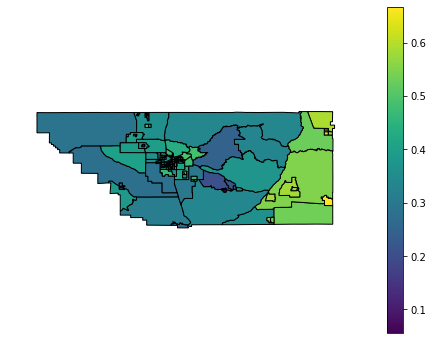

In [109]:
geoplot.choropleth(kc_mesma_gpd, hue= kc_mesma_gpd[('MeanSoil' , 'jun18_Soil')], legend = True)
plt.show()

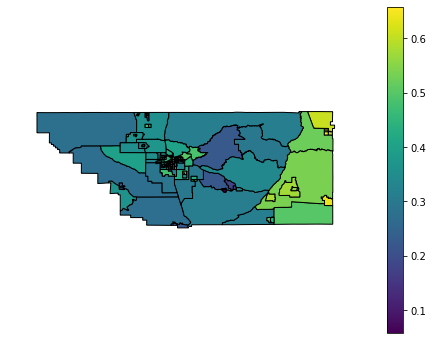

In [114]:
geoplot.choropleth(kc_mesma_gpd, hue=kc_mesma_gpd[('MeanSoil' , 'july18_Soil')], legend = True)
plt.show()

It appears that there is not much difference between June and July average bare soil cover. There is more bare soil to the East as Kern approaches the Mojave Desert, and less bare soil to the West where Kern lies in the southern San Joaquin Valley.

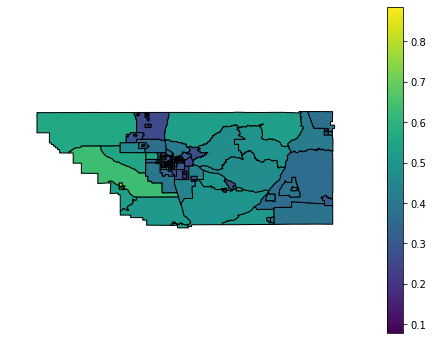

In [113]:
geoplot.choropleth(kc_mesma_gpd, hue=kc_mesma_gpd[('MeanNPV' , 'jun18_NPV')], legend = True)
plt.show()

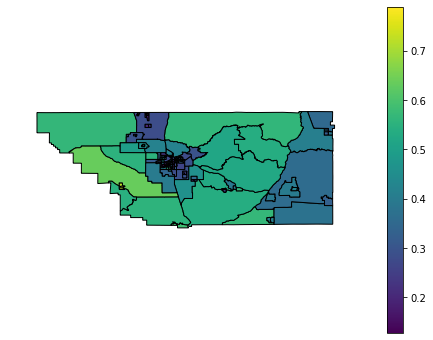

In [115]:
geoplot.choropleth(kc_mesma_gpd, hue=kc_mesma_gpd[('MeanNPV' , 'july18_NPV')], legend = True)
plt.show()

While it looks like the nonphotosynthetic vegetation in Kern is increasing from June to July, this is actually due to slightly different scales between the two maps. As I get better at Python I will figure out how to customize the color scales more. 

I have been having some trouble mapping the conservation data and general plan data. Will explore those spatially throughout the rest of the semester. I will also practice more spatial data processing, especially since the conservation data, general plan data, and census tract data have different geographic units. Not sure yet how I will compare areas between those datasets.

I think I will narrow my focus to 2018 since that is the year I have data for. So, for 2018, what are the likely dust generation areas that I can identify using publicly available data?